In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",None)#displays all rows (,none == max)we can also write , 10 (to show 10 rows)


In [3]:
df = pd.read_csv(r"C:\Users\HP\Downloads\Copy of Student_performance_data 123.csv")
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4


In [4]:
df.shape

(2392, 15)

In [5]:
df.info()#Column names,data types,nullcounts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 280.4 KB


In [6]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [7]:
# Convert final grade (out of 100) to percentage and making a new column called 'FINSCOR'
df["FINSCOR"] = (df["GPA"] /4) * 100


In [8]:
#CREATING A NEW COLUMN ON BASIS OF FINAL SCORE
def performancecategory(FINSCOR):
    if FINSCOR>=75:
        return "high performer"
    elif FINSCOR>=50:
        return "Average performer"
    else:
        return "weak performer"

df["performancecategory"] = df["FINSCOR"].apply(performancecategory)        
        

In [19]:
df["attendancerisk"] = np.where(df["Absences"]>15,"High","Low")


In [10]:
df["dropoutrisk"]= np.where((df["FINSCOR"]<45)|(df["Absences"]>19),"High risk","Low risk")

In [21]:
df[df["dropoutrisk"]=="High risk"]
#used to filter out data on bases of high and low risk of performance category

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,FINSCOR,performancecategory,attendancerisk,dropoutrisk,performanceband
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4,2.815056,weak performer,High,High risk,fail
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4,32.201530,weak performer,High,High risk,fail
7,1008,15,1,1,4,15.424496,22,1,1,1,0,0,0,1.360143,4,34.003568,weak performer,High,High risk,fail
11,1012,17,0,0,1,7.598486,15,0,2,0,0,0,1,1.559595,4,38.989863,weak performer,Low,High risk,fail
12,1013,17,0,1,1,10.038712,21,0,3,1,0,0,0,1.520078,4,38.001945,weak performer,High,High risk,fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375,3376,18,0,0,2,18.925290,24,0,1,1,0,1,1,1.164539,0,29.113479,weak performer,High,High risk,fail
2378,3379,15,1,0,2,12.905555,26,0,2,0,0,1,1,0.709353,3,17.733834,weak performer,High,High risk,fail
2382,3383,16,0,0,3,13.941823,20,0,2,0,0,0,0,1.191929,3,29.798226,weak performer,High,High risk,fail
2385,3386,16,1,0,1,1.445434,20,0,3,1,1,0,0,1.395631,1,34.890767,weak performer,High,High risk,fail


In [22]:
df[df["Absences"]>=25]

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,FINSCOR,performancecategory,attendancerisk,dropoutrisk,performanceband
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4,2.815056,weak performer,High,High risk,fail
18,1019,18,0,1,3,16.254658,29,0,2,1,0,0,1,0.469553,4,11.738833,weak performer,High,High risk,fail
21,1022,15,0,0,2,15.323142,25,0,1,1,0,0,0,0.346894,4,8.672351,weak performer,High,High risk,fail
22,1023,16,1,1,0,18.648880,29,1,1,0,0,0,0,0.312546,4,7.813656,weak performer,High,High risk,fail
32,1033,18,0,0,3,7.663289,25,0,1,0,1,0,0,0.384617,4,9.615424,weak performer,High,High risk,fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329,3330,16,0,0,1,9.273516,25,0,2,1,0,0,0,0.813148,3,20.328691,weak performer,High,High risk,fail
2349,3350,18,1,0,1,9.213699,25,1,1,1,0,0,0,0.932670,2,23.316743,weak performer,High,High risk,fail
2370,3371,18,1,2,1,2.912575,25,0,1,0,1,0,1,0.569420,4,14.235497,weak performer,High,High risk,fail
2373,3374,18,0,3,2,19.088954,25,0,2,0,0,0,0,0.825020,1,20.625491,weak performer,High,High risk,fail


In [23]:
df.sort_values(by=["FINSCOR"])
#to sort valus in assending order (default ascending)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,FINSCOR,performancecategory,attendancerisk,dropoutrisk,performanceband
2124,3125,16,1,1,3,5.302465,27,0,0,0,1,0,0,0.0,4,0.0,weak performer,High,High risk,NaN
1724,2725,16,0,3,3,7.301673,27,0,0,0,0,0,0,0.0,4,0.0,weak performer,High,High risk,NaN
87,1088,15,0,2,1,0.008031,27,0,1,0,0,1,0,0.0,4,0.0,weak performer,High,High risk,NaN
1512,2513,15,0,2,1,4.459000,27,0,1,0,0,0,0,0.0,4,0.0,weak performer,High,High risk,NaN
484,1485,15,1,0,3,0.767231,29,0,0,0,0,0,0,0.0,4,0.0,weak performer,High,High risk,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,1443,15,0,0,2,19.424398,0,0,3,0,1,1,1,4.0,0,100.0,high performer,Low,Low risk,great
1919,2920,15,0,3,1,17.442121,1,1,1,1,1,0,0,4.0,0,100.0,high performer,Low,Low risk,great
44,1045,18,1,0,1,18.921512,1,1,3,1,1,0,0,4.0,0,100.0,high performer,Low,Low risk,great
2319,3320,17,0,0,2,9.285447,0,0,4,1,0,1,1,4.0,3,100.0,high performer,Low,Low risk,great


In [24]:
df.sort_values(by=["FINSCOR"],ascending=False)
#descending order

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,FINSCOR,performancecategory,attendancerisk,dropoutrisk,performanceband
44,1045,18,1,0,1,18.921512,1,1,3,1,1,0,0,4.0,0,100.0,high performer,Low,Low risk,great
442,1443,15,0,0,2,19.424398,0,0,3,0,1,1,1,4.0,0,100.0,high performer,Low,Low risk,great
2028,3029,16,1,0,0,18.656924,0,1,4,1,0,0,1,4.0,0,100.0,high performer,Low,Low risk,great
1919,2920,15,0,3,1,17.442121,1,1,1,1,1,0,0,4.0,0,100.0,high performer,Low,Low risk,great
1705,2706,18,1,0,2,8.858282,0,1,4,1,0,0,0,4.0,0,100.0,high performer,Low,Low risk,great
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,1475,17,1,1,2,1.444587,24,0,0,0,0,0,0,0.0,4,0.0,weak performer,High,High risk,NaN
1500,2501,17,1,1,1,2.873753,29,0,1,0,0,0,0,0.0,4,0.0,weak performer,High,High risk,NaN
629,1630,17,1,0,0,2.139825,28,0,1,1,0,1,0,0.0,4,0.0,weak performer,High,High risk,NaN
2124,3125,16,1,1,3,5.302465,27,0,0,0,1,0,0,0.0,4,0.0,weak performer,High,High risk,NaN


In [25]:
#to sort data for multiple columns
df.sort_values(by=["FINSCOR","Absences"],ascending=[False,True])

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,FINSCOR,performancecategory,attendancerisk,dropoutrisk,performanceband
442,1443,15,0,0,2,19.424398,0,0,3,0,1,1,1,4.0,0,100.0,high performer,Low,Low risk,great
1705,2706,18,1,0,2,8.858282,0,1,4,1,0,0,0,4.0,0,100.0,high performer,Low,Low risk,great
2028,3029,16,1,0,0,18.656924,0,1,4,1,0,0,1,4.0,0,100.0,high performer,Low,Low risk,great
2319,3320,17,0,0,2,9.285447,0,0,4,1,0,1,1,4.0,3,100.0,high performer,Low,Low risk,great
44,1045,18,1,0,1,18.921512,1,1,3,1,1,0,0,4.0,0,100.0,high performer,Low,Low risk,great
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2310,3311,16,1,1,1,0.112626,28,0,2,0,0,0,0,0.0,1,0.0,weak performer,High,High risk,NaN
484,1485,15,1,0,3,0.767231,29,0,0,0,0,0,0,0.0,4,0.0,weak performer,High,High risk,NaN
1500,2501,17,1,1,1,2.873753,29,0,1,0,0,0,0,0.0,4,0.0,weak performer,High,High risk,NaN
1622,2623,16,0,1,1,2.530906,29,0,2,0,0,0,0,0.0,4,0.0,weak performer,High,High risk,NaN


In [26]:
df["performanceband"]=pd.cut(
    df["FINSCOR"],
    bins=[0,40,60,75,100],
    labels=["fail","below average","above average","great"])
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,FINSCOR,performancecategory,attendancerisk,dropoutrisk,performanceband
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2,73.229890,Average performer,Low,Low risk,above average
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1,76.072871,high performer,Low,Low risk,great
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4,2.815056,weak performer,High,High risk,fail
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3,51.355454,Average performer,Low,Low risk,below average
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4,32.201530,weak performer,High,High risk,fail


<Figure size 640x480 with 0 Axes>

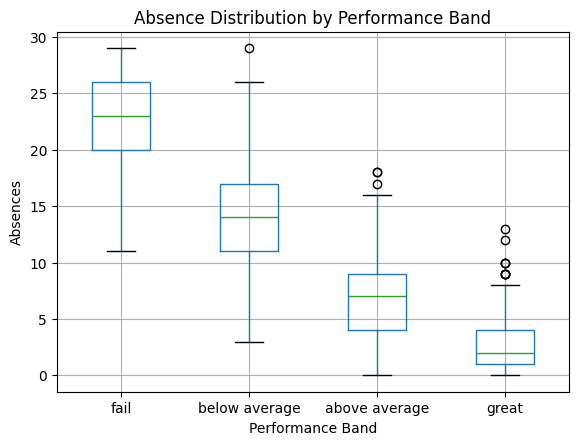

In [27]:
#DISTRIBUTION OF ABSENSE OVER PERFORMANCE BAND

plt.figure()
df.boxplot(column="Absences",by="performanceband")
plt.xlabel("Performance Band")
plt.ylabel("Absences")
plt.title("Absence Distribution by Performance Band")
plt.suptitle("")
plt.show()



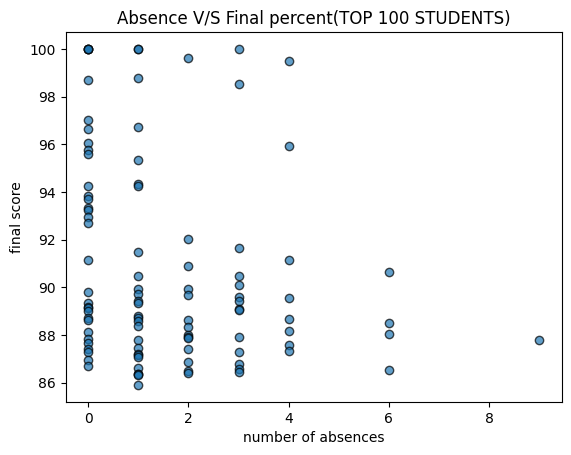

In [28]:
#Impact of Absences on Academic Performance Among Top 100 Values using scatter plot
top_100 = df.sort_values(by="FINSCOR", ascending=False).head(200)
plt.figure()
plt.scatter(top_100["Absences"],top_100["FINSCOR"],alpha=0.7,edgecolors="black")
plt.xlabel("number of absences" )
plt.ylabel("final score" )
plt.title("Absence V/S Final percent(TOP 100 STUDENTS)") 
plt.show()    


In [29]:
df.head()
df.shape


(2392, 20)

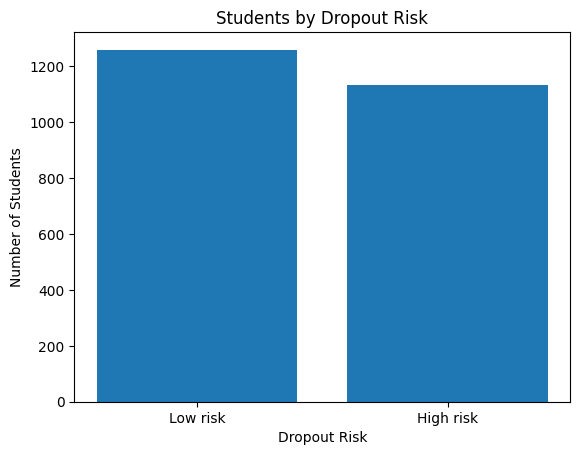

dropoutrisk
Low risk     1259
High risk    1133
Name: count, dtype: int64

In [30]:
#Proportion of Students Identified as High and Low Dropout Risk(bar chart)
risk_counts = df["dropoutrisk"].value_counts()

plt.figure()
plt.bar(risk_counts.index, risk_counts.values)
plt.xlabel("Dropout Risk")
plt.ylabel("Number of Students")
plt.title("Students by Dropout Risk")
plt.show()
df["dropoutrisk"].value_counts()


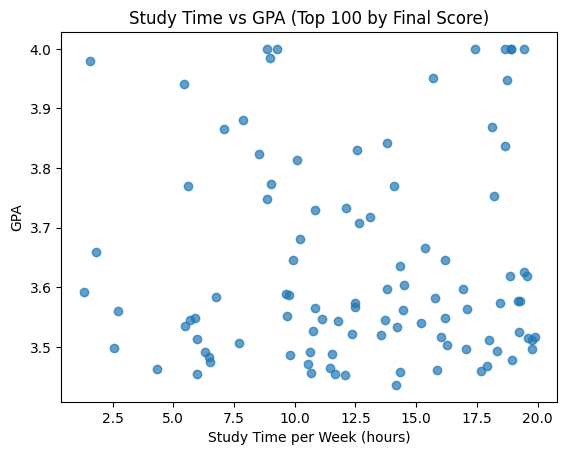

In [31]:
#Impact of Weekly Study Time on GPA in High-Achieving Students(scatter plot)
top_100 = df.sort_values(by="FINSCOR", ascending=False).head(100)
plt.figure()
plt.scatter(top_100["StudyTimeWeekly"], top_100["GPA"], alpha=0.7)
plt.xlabel("Study Time per Week (hours)")
plt.ylabel("GPA")
plt.title("Study Time vs GPA (Top 100 by Final Score)")

plt.show()


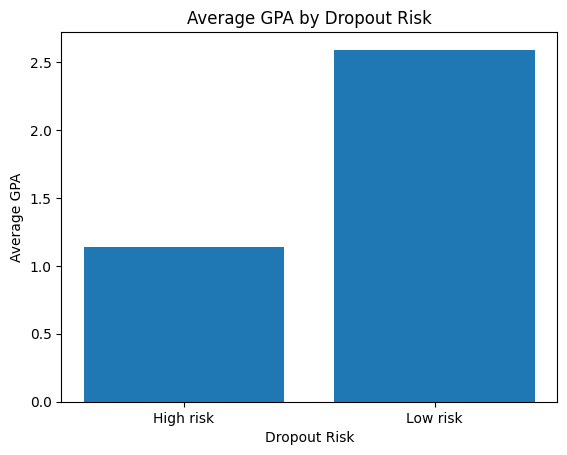

In [32]:
#Impact of GPA on Students Droping Out
avg_gpa = df.groupby("dropoutrisk")["GPA"].median()
plt.figure()
plt.bar(avg_gpa.index, avg_gpa.values)
plt.xlabel("Dropout Risk")
plt.ylabel("Average GPA")
plt.title("Average GPA by Dropout Risk")
plt.show()


dropoutrisk
Low risk     1259
High risk    1133
Name: count, dtype: int64

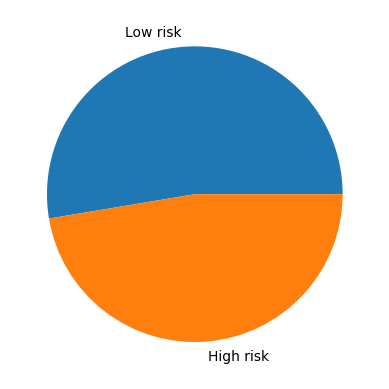

In [33]:
#Distribution of student on hig risk and low risk
plt.figure()
counts=df["dropoutrisk"].value_counts()
plt.pie(counts.values,labels=counts.index)   
df["dropoutrisk"].value_counts()

performanceband
fail             935
below average    656
above average    464
great            321
Name: count, dtype: int64

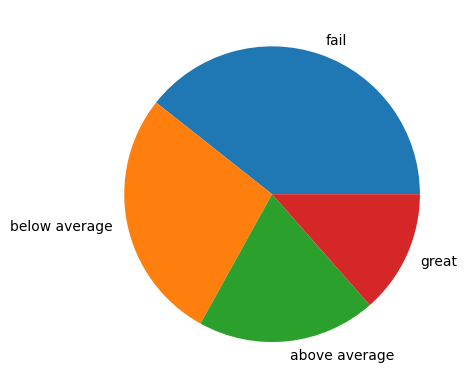

In [34]:
#Proportion of Students based on performance band
plt.figure()
counts=df["performanceband"].value_counts()
plt.pie(counts.values,labels=counts.index) 
df["performanceband"].value_counts()        

Text(0.5, 1.0, 'number of students in particular performance band')

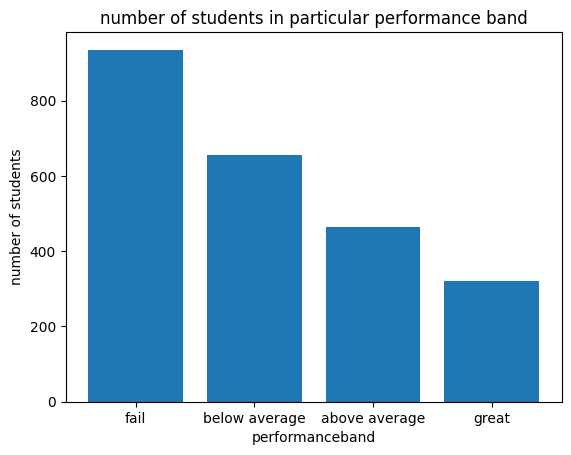

In [35]:
#Student Count by Academic Performance Category
band_students=df["performanceband"].value_counts()
number_of_students= band_students.sum()
plt.figure()
plt.bar(band_students.index,band_students.values)
plt.xlabel("performanceband")
plt.ylabel("number of students")
plt.title("number of students in particular performance band")

In [36]:
df["performanceband"].value_counts()

performanceband
fail             935
below average    656
above average    464
great            321
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_47360\1210444563.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_absences=df.groupby("performanceband")["Absences"].mean()


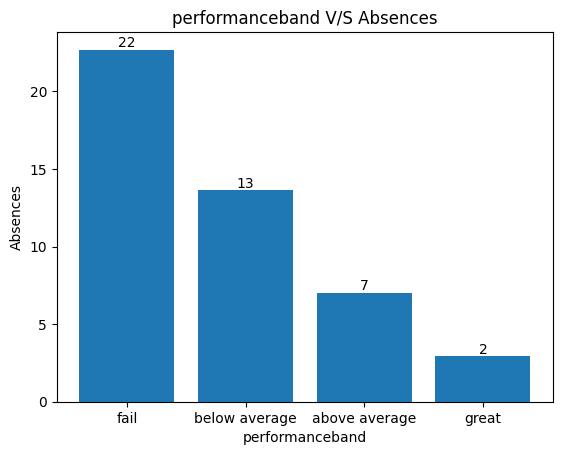

In [37]:
#Comparison of Average Absenteeism by Performance Category
band_students=df["performanceband"].value_counts()
average_absences=df.groupby("performanceband")["Absences"].mean()
plt.figure()
bars=plt.bar(band_students.index,average_absences.values)
plt.xlabel("performanceband")
plt.ylabel("Absences")
plt.title("performanceband V/S Absences")
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(height)}",
        ha="center",
        va="bottom"
    )

plt.show()


In [38]:
df.head()



,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,FINSCOR,performancecategory,attendancerisk,dropoutrisk,performanceband
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2,73.229890,Average performer,Low,Low risk,above average
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1,76.072871,high performer,Low,Low risk,great
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4,2.815056,weak performer,High,High risk,fail
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3,51.355454,Average performer,Low,Low risk,below average
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4,32.201530,weak performer,High,High risk,fail


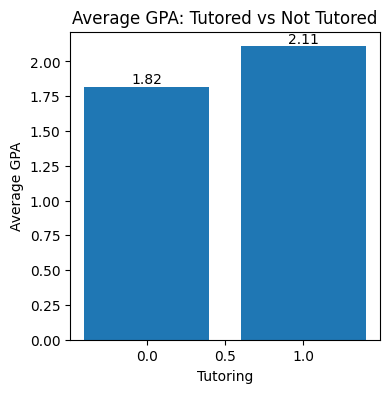

In [39]:
#Comparing Average GPA categorized by tutored and non-tutored students
avg_gpa = df.groupby("Tutoring")["GPA"].mean()

plt.figure(figsize=(4,4))
bars = plt.bar(avg_gpa.index, avg_gpa.values)

plt.xlabel("Tutoring")
plt.ylabel("Average GPA")
plt.title("Average GPA: Tutored vs Not Tutored")

# add values on bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{height:.2f}",
        ha="center",
        va="bottom"
    )

plt.show()
